In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df=pd.read_csv("/content/GOOGL.csv")

In [3]:
#display the rows of the dataset

In [4]:
print("initial dataset:")
print(df.head())

initial dataset:
         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602


In [5]:
#check for missing values

In [6]:
print("\nchecking for missing values:")
print(df.isnull().sum())


checking for missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
#datapreprocessing

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [9]:
#Histogram

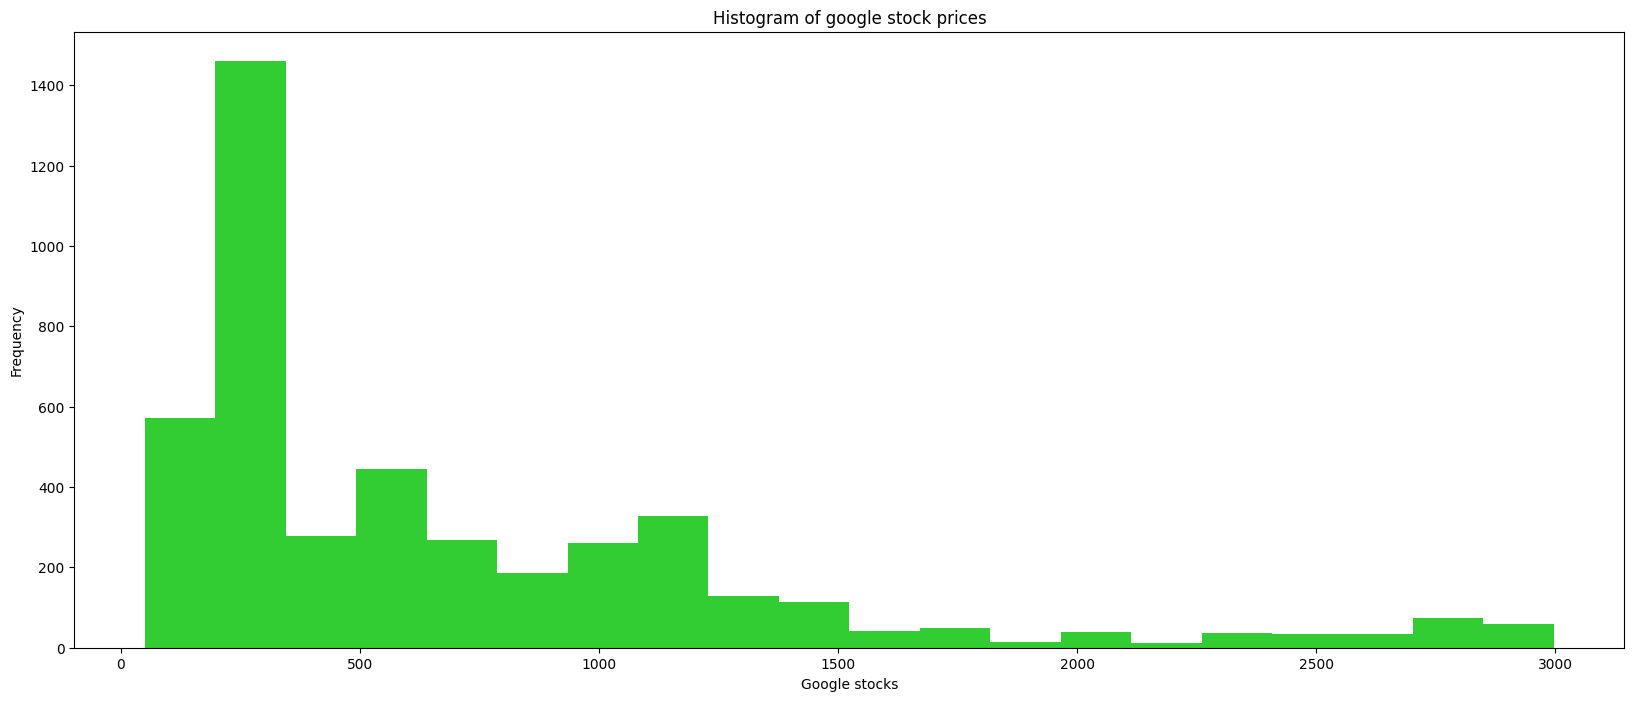

In [10]:
plt.figure(figsize=(20,8))
plt.hist(df['Adj Close'],bins=20, color='LimeGreen')
plt.title('Histogram of google stock prices')
plt.xlabel('Google stocks')
plt.ylabel('Frequency')
plt.show()

In [11]:
#time series trend

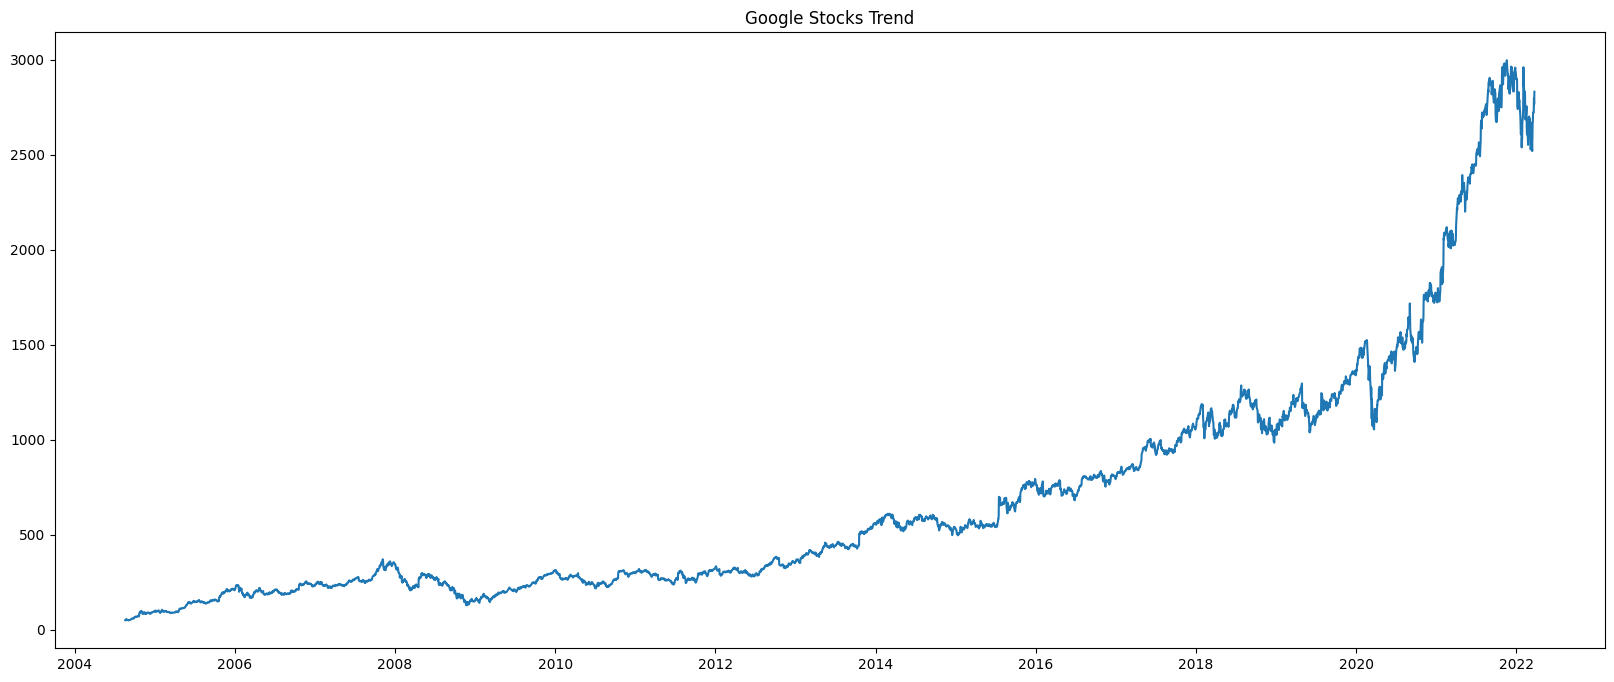

In [12]:
plt.figure(figsize=(20,8))
plt.plot(df['Adj Close'])
plt.title('Google Stocks Trend')
plt.show()


In [13]:
closing_prices = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(closing_prices)

In [14]:
train_data= scaled_prices[:int(len(scaled_prices)*0.95), :]
train_features, train_labels= [],[]

for i in range(60, len(train_data)):
  train_features.append(train_data[i-60:i,0])
  train_labels.append(train_data[i,0])

train_features, train_labels = np.array(train_features),np.array(train_labels)
train_features = np.reshape(train_features,(train_features.shape[0],train_features.shape[1],1))


In [15]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(train_features.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))


In [16]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(train_features, train_labels,epochs = 25, batch_size = 32)

Epoch 1/25
 54/130 [===========>..................] - ETA: 5s - loss: 0.0039

In [ ]:
#create the testing dataset

In [ ]:
test_data= scaled_prices[int(len(scaled_prices)*0.95)-60:, :]
x_test , y_test=  [], closing_prices[int(len(closing_prices)*0.95):,:]


In [ ]:
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
training_set = df.iloc[:int(len(closing_prices)*0.95)]
validation_set =df.iloc[int(len(closing_prices)*0.95):]
validation_set.loc[:,'Predictions'] = predictions.copy()

In [ ]:
#visualizing predictions

In [ ]:
#visualize the predicted prices compared to actual prices

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Stock Price Predictionusing LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(training_set['Close'],label='Training Data')
plt.plot(validation_set[['Close','Predictions']],label=['Actual Prices','Predicted Prices'])
plt.legend(loc='lower right')
plt.show()

In [ ]:
#model Evaluation Metrics: we calculate the mean squared error (MSE) as a metric to evaluate the performance of the LSTM model.

In [ ]:
mse_lstm= mean_squared_error(df['Close'][-len(predictions):],predictions)
print('\nLSTM Model Evaluation:')
print(f'MSE:{mse_lstm:2f}')
